<a href="https://www.kaggle.com/code/yasmin54301/flight-price-prediction?scriptVersionId=107526906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## *Importing Modules* 

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
%matplotlib inline

## *Reading the file*

In [2]:
data = pd.read_csv("../input/flight-price-prediction/Clean_Dataset.csv", delimiter=',', encoding = "utf-8")

## *Data Description*

**The various features of the cleaned dataset are explained below:** 

 **1) Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different  airlines.     
 **2) Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature.    
 **3) Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities.     
 **4) Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.      
 **5) Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.      
 **6) Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.     
 **7) Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities.     
 **8) Class:** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.    
 **9) Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.   
 **10)Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.   
 **11) Price:** Target variable stores information of the ticket price.    

## *Buiseness Qs*

- ### *How does the ticket price vary between Economy and Business class?*
- ### *Does price vary with Airlines?*
- ### *How is the price affected when tickets are bought in just 1 or 2 days before departure?*   
- ### *Does ticket price change based on the departure time and arrival time?*  
- ### *How the price changes with change in Source and Destination?*
- ### *Does the number of stops influences the price?*
- ### *What variables influence most the price?*

## *Data Analysis*

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
data.describe(include = "object")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [6]:
data.describe(include = "float")

,duration
count,300153.000000
mean,12.221021
std,7.191997
min,0.830000
25%,6.830000
50%,11.250000
75%,16.170000
max,49.830000


In [7]:
data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [8]:
data['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [9]:
data['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [10]:
data['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [11]:
data['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [12]:
data['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [13]:
data.shape 

(300153, 12)

In [14]:
data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

## *Data Visualization*

<AxesSubplot:xlabel='price', ylabel='Count'>

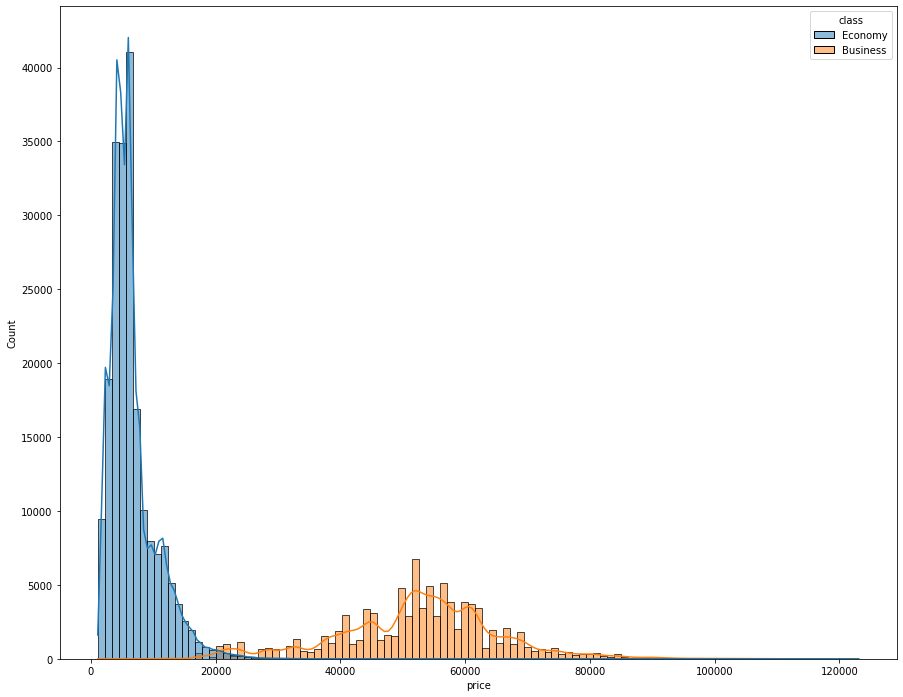

In [15]:
plt.figure(figsize=(15,12))
sns.histplot(data, x="price", kde=True,hue='class')

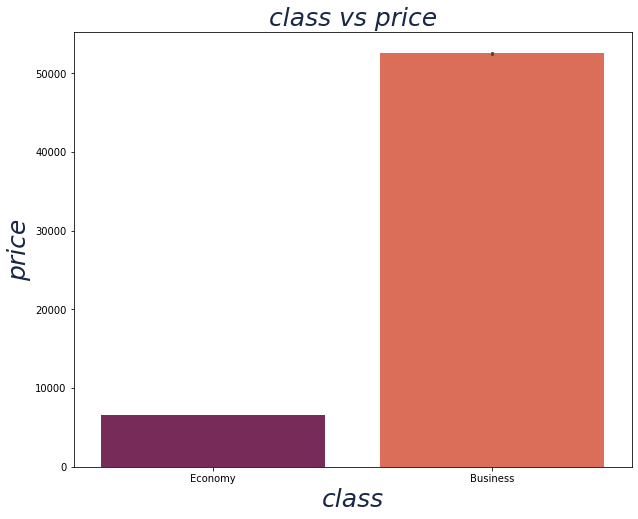

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',data=data,y='price',palette='rocket')
plt.xlabel(fontsize=25,color='#182747',xlabel='class',fontstyle='italic')
plt.ylabel(fontsize=25,color='#182747',ylabel='price',fontstyle='italic')
plt.title(label='class vs price',fontsize=25,color='#182747',fontstyle='italic')
plt.rcParams["figure.figsize"] = (10,7)
plt.show()

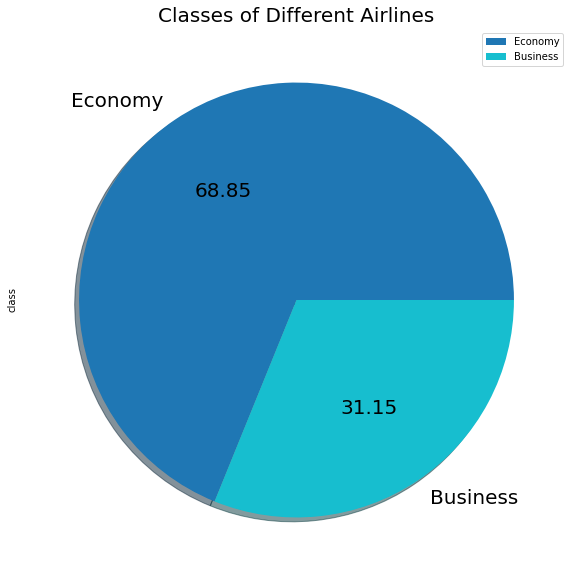

In [17]:
plt.figure(figsize=(12,10))
data['class'].value_counts().plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='tab10', shadow=True)
plt.title('Classes of Different Airlines',fontsize=20)
plt.legend(['Economy','Business'])
plt.show()

### *Economy class customers are a way more than business class, while the price of business class is higher.*

<br>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


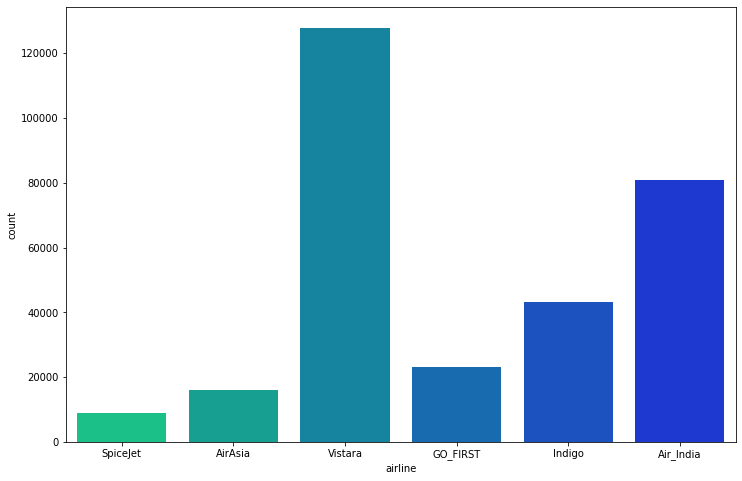

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(data['airline'], palette='winter_r');

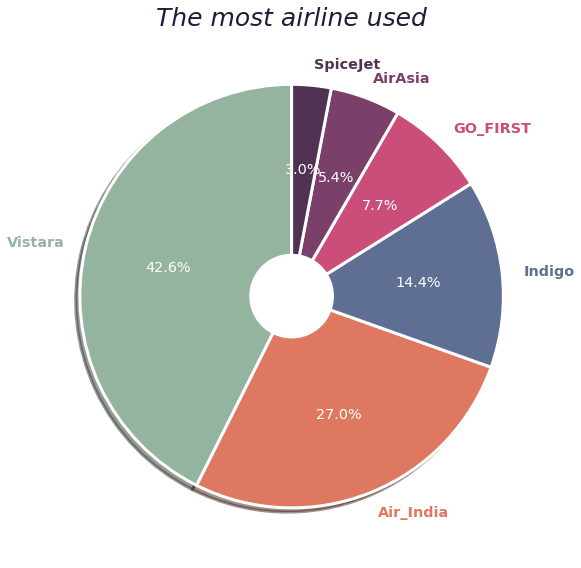

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))
colors=['#94B49F','#DF7861','#5F6F94','#CA4E79','#7A4069','#513252']
colors2=['#A1C298','#C6EBC5','#FBF2C','#FFA7070','#DF7861','#F5C7A9']
patches, texts, pcts = ax.pie(
    data.airline.value_counts(), labels=[*data.airline.value_counts().index],shadow=True, autopct='%.1f%%',colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
centre_circle = plt.Circle((0,0),0.20,fc='white') 
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='The most airline used',fontsize=25,color='#251B37',fontstyle='italic')
plt.tight_layout()

### *Vistara is the most used airline, followed by Air_India*

<br>

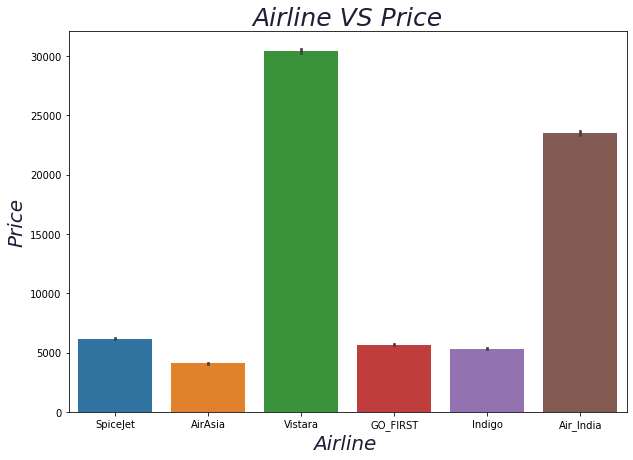

In [20]:
sns.barplot(data=data,x='airline',y='price')
plt.xlabel(fontsize=20,color='#251B37',xlabel='Airline ',fontstyle='italic')
plt.ylabel(fontsize=20,color='#251B37',ylabel='Price',fontstyle='italic')
plt.title(label='Airline VS Price',fontsize=25,color='#251B37',fontstyle='italic')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

### *Vistara price is six times higher than nearly the rest of other airlines.*

Text(0.5, 1.0, 'Price With Airline')

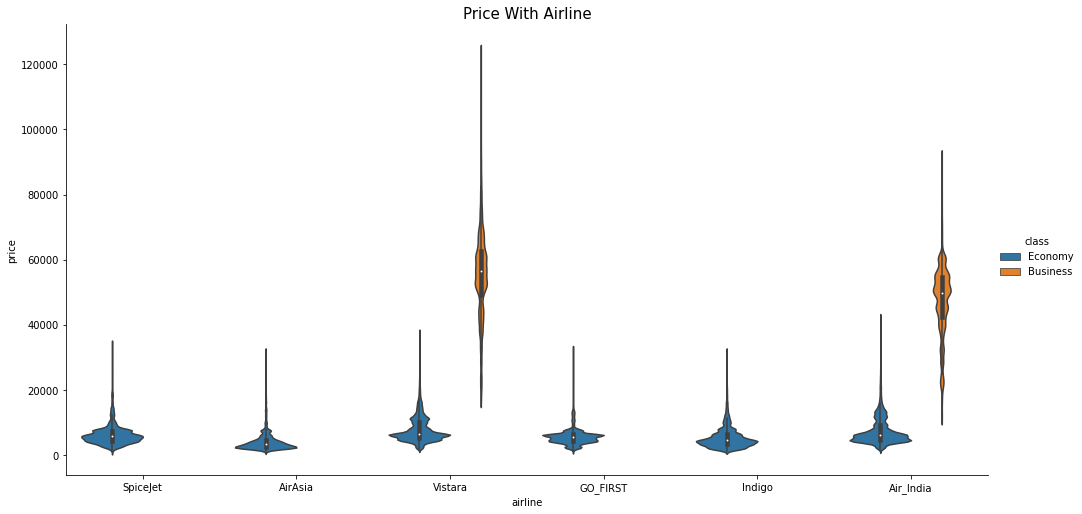

In [21]:
sns.catplot(kind='violin',data=data,x='airline',y='price',hue="class",aspect=2,height=7)
plt.title('Price With Airline',fontsize=15)

<br>

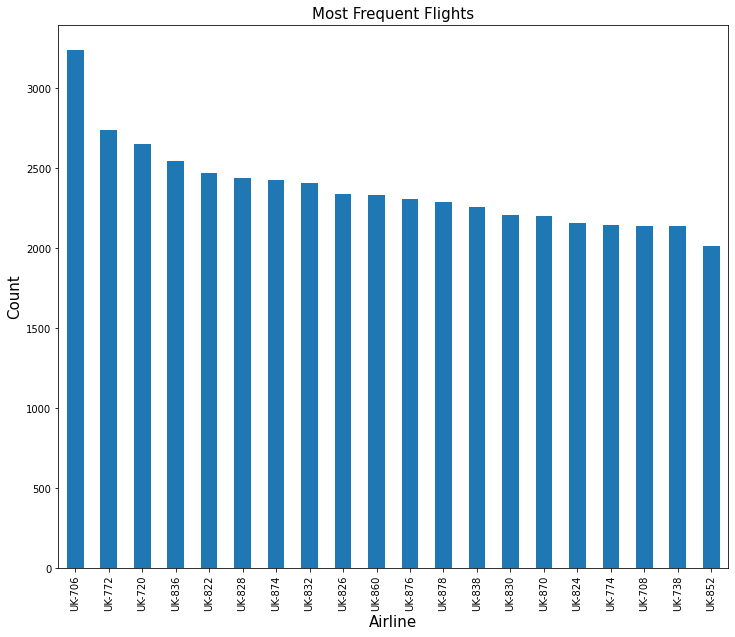

In [22]:
flights_Code = data.flight.value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(12,10))
# sns.countplot(flights_Code,palette='hls')
flights_Code.plot(kind='bar')
plt.title('Most Frequent Flights',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

### *Most frequent flights are from Delhi to Mumbai*

In [23]:
data[data['airline']=='Vistara'].groupby(['flight','airline']).count().head(10)

,,Unnamed: 0,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
flight,airline,,,,,,,,,,
UK-613,Vistara,371,371,371,371,371,371,371,371,371,371
UK-621,Vistara,113,113,113,113,113,113,113,113,113,113
UK-627,Vistara,151,151,151,151,151,151,151,151,151,151
UK-637,Vistara,401,401,401,401,401,401,401,401,401,401
UK-641,Vistara,6,6,6,6,6,6,6,6,6,6
UK-651,Vistara,354,354,354,354,354,354,354,354,354,354
UK-653,Vistara,515,515,515,515,515,515,515,515,515,515
UK-655,Vistara,209,209,209,209,209,209,209,209,209,209
UK-657,Vistara,755,755,755,755,755,755,755,755,755,755


### *All frequent trips are from the same company Vistara*

<br>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


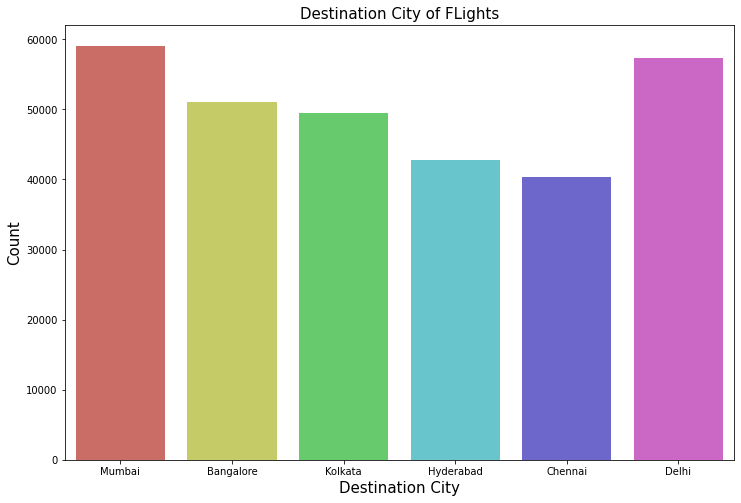

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data['destination_city'],palette='hls')
plt.title('Destination City of FLights',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

### *Mumbai and Delhi are the most attractive destinations for customers*

<br>

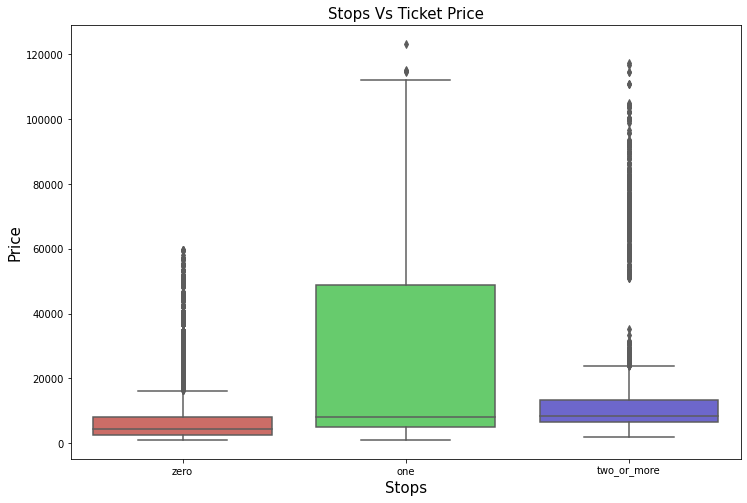

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='stops',y='price',data=data,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### *Flights having zero stop has maximum ticket price*

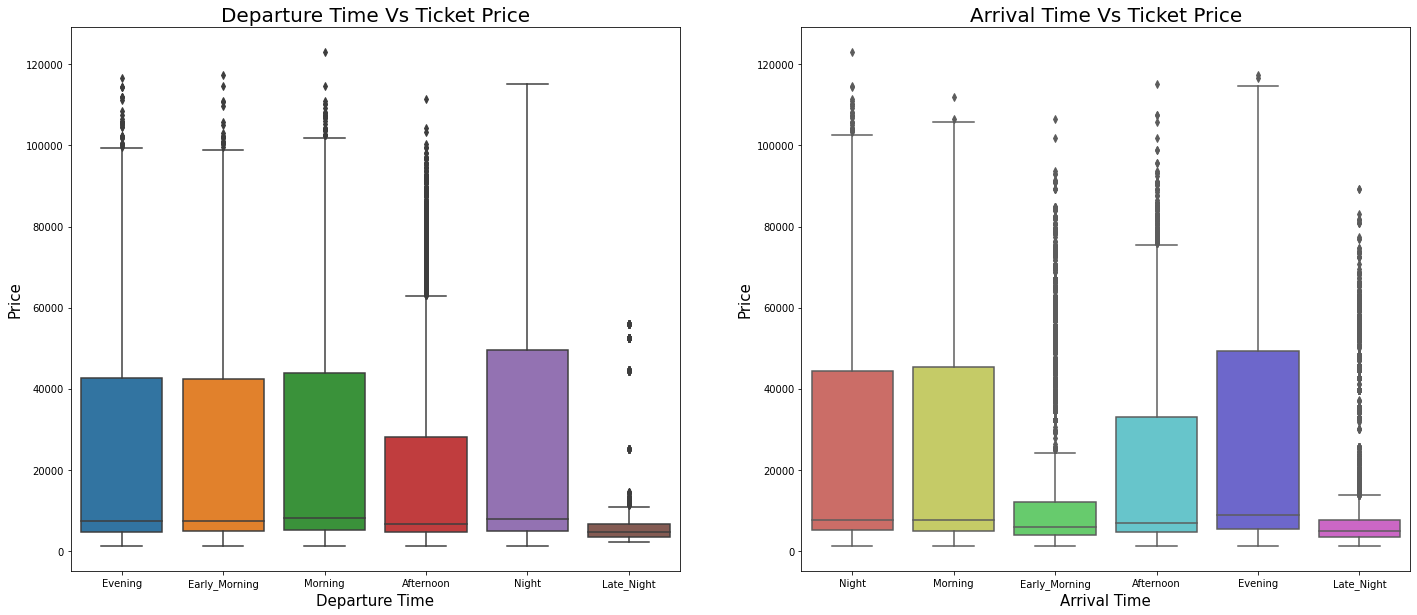

In [26]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=data)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=data,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### *Ticket Price is More for the Flights when the Departure Time is at Night*
### *Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening*
### *Ticket Price is Low for the Flights Having Departure Time at Late_night*

### *Ticket Price is More for the Flights when the Arrival Time is at Evening*
### *Ticket Price is almost equal for flights Having Arrival time is at Morning and Night*
### *Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time*

<br>

<Figure size 1800x720 with 0 Axes>

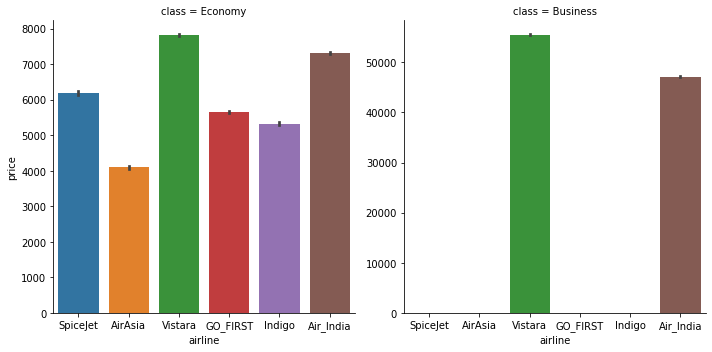

In [27]:
plt.figure(figsize=(25,10))    
sns.catplot(y='price', x='airline', data=data, kind='bar',col='class',sharey=False)
plt.show()

### *Vistara and Air_india are the customer choice for the business class booking.*

<br>

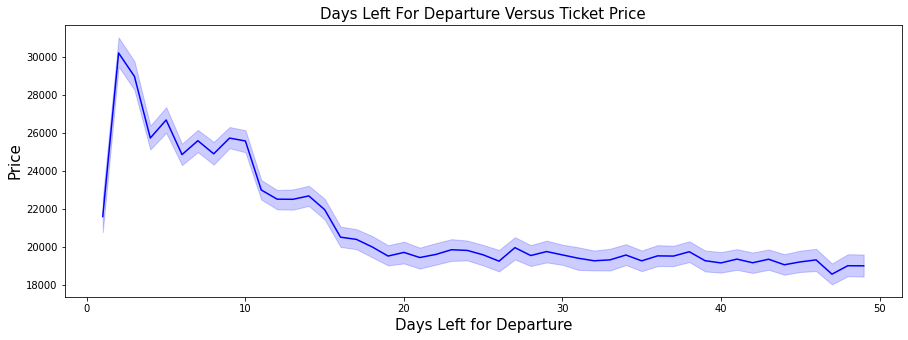

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### *Ticket price increases as the days left before departure decreases.*

<br>

## *Data preprocessing*

### *Checking for Nulls* 

In [29]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

*There is no missing values*

### *Checking for Duplicates* 

In [30]:
data.duplicated().sum()

0

### *Handling outliers* 

<AxesSubplot:xlabel='price', ylabel='Count'>

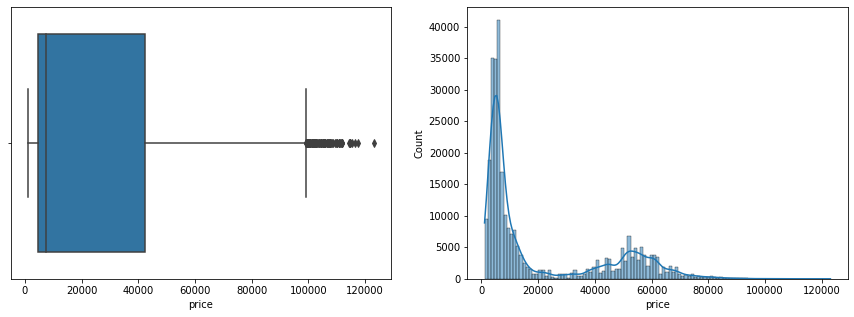

In [31]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)

<AxesSubplot:xlabel='duration'>

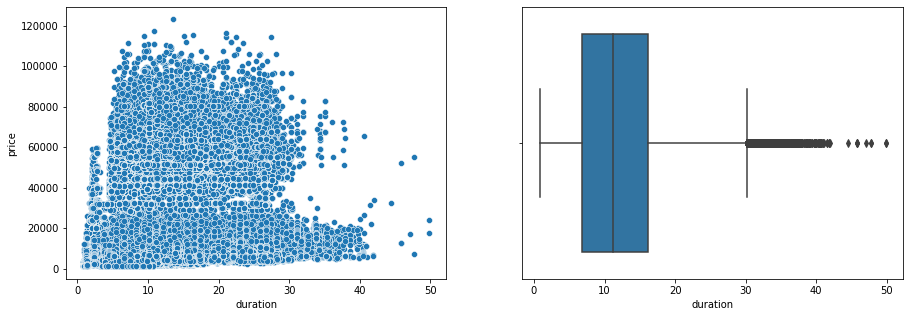

In [32]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='duration',y='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,x='duration')

<AxesSubplot:xlabel='days_left'>

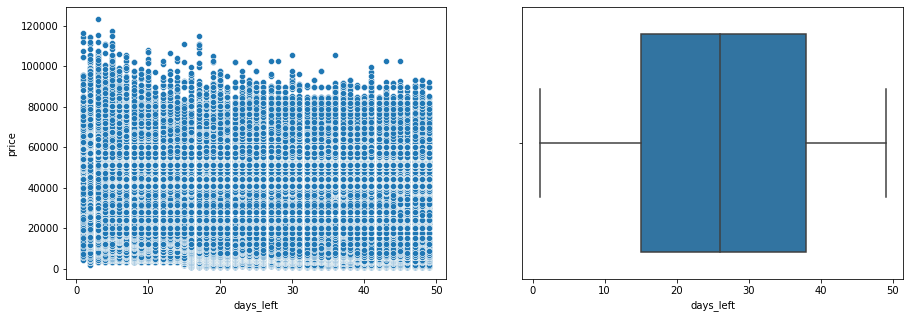

In [33]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='days_left',y='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,x='days_left')

In [34]:
x=data[data['price']<100000]
x.shape

(300045, 12)

In [35]:
x=data[data['duration']>30]
x.shape

(2226, 12)

In [36]:
data=data[data['price']<100000]
data=data[data['duration']<30]

### *Data cleaning* 

In [37]:
# Drop Unnecessary Columns
data.drop('Unnamed: 0', axis=1, inplace=True)

### *Data Fitting & Splitting* 

In [38]:
le=LabelEncoder
airline_le=LabelEncoder()
data['airline']=airline_le.fit_transform(data['airline'])
flight_le=LabelEncoder()
data['flight']=flight_le.fit_transform(data['flight'])
source_city_le=LabelEncoder()
data['source_city']=source_city_le.fit_transform(data['source_city'])
departure_time_le=LabelEncoder()
data['departure_time']=departure_time_le.fit_transform(data['departure_time'])
stops_le=LabelEncoder()
data['stops']=stops_le.fit_transform(data['stops'])
arrival_time_le=LabelEncoder()
data['arrival_time']=arrival_time_le.fit_transform(data['arrival_time'])
destination_city_le=LabelEncoder()
data['destination_city']=destination_city_le.fit_transform(data['destination_city'])
class_le=LabelEncoder()
data['class']=class_le.fit_transform(data['class'])


In [39]:
airline_le.classes_

array(['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet',
       'Vistara'], dtype=object)

In [40]:
flight_le.classes_

array(['6E-102', '6E-105', '6E-113', ..., 'UK-994', 'UK-995', 'UK-996'],
      dtype=object)

In [41]:
destination_city_le.classes_

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

In [42]:
class_le.classes_


array(['Business', 'Economy'], dtype=object)

In [43]:
data.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.635802,-0.028967,0.057271,-0.030738,0.037378,-0.027150,-0.177537,0.007310,-0.012061,0.242182
flight,0.635802,1.000000,-0.009369,0.072334,-0.120081,0.067260,-0.034049,-0.259440,0.216234,-0.000940,0.305566
source_city,-0.028967,-0.009369,1.000000,-0.006713,0.002564,0.042966,-0.224786,0.001350,0.015501,-0.003799,0.003589
departure_time,0.057271,0.072334,-0.006713,1.000000,-0.007386,-0.045328,-0.002453,-0.053339,0.094472,-0.001649,0.058811
stops,-0.030738,-0.120081,0.002564,-0.007386,1.000000,0.010161,-0.011617,0.099855,-0.494524,-0.006215,-0.203460
arrival_time,0.037378,0.067260,0.042966,-0.045328,0.010161,1.000000,-0.037585,-0.027263,0.012036,-0.004488,0.041850
destination_city,-0.027150,-0.034049,-0.224786,-0.002453,-0.011617,-0.037585,1.000000,0.001077,-0.000370,-0.004968,0.005505
class,-0.177537,-0.259440,0.001350,-0.053339,0.099855,-0.027263,0.001077,1.000000,-0.153553,0.013693,-0.938736
duration,0.007310,0.216234,0.015501,0.094472,-0.494524,0.012036,-0.000370,-0.153553,1.000000,-0.033456,0.215879
days_left,-0.012061,-0.000940,-0.003799,-0.001649,-0.006215,-0.004488,-0.004968,0.013693,-0.033456,1.000000,-0.090955


In [44]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [45]:
x= data.drop(['price'] , axis=1).values
y = data['price'].values

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [47]:
x_train.shape

(238176, 10)

In [48]:
x_test.shape

(59544, 10)

### *Data Scaling using Robust scalar* 

In [49]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [50]:
x_train.shape

(238176, 10)

## *Modeling*

### *Linear Regression Model* 

In [51]:
reg = linear_model.LinearRegression()

In [52]:
reg.fit(x_train , y_train)

LinearRegression()

In [53]:
train_score_reg=reg.score(x_train,y_train)

In [54]:
test_score_reg=reg.score(x_test,y_test)

In [55]:
reg.coef_

array([  3573.87834132,    218.34120059,    319.61093769,    128.58930694,
        -3384.43955818,    568.72407177,    362.3188637 , -44473.06513009,
          665.85935604,  -2979.81695343])

In [56]:
pd.DataFrame(reg.coef_ , data.columns[:-1] , columns=['Coeficient'])

,Coeficient
airline,3573.878341
flight,218.341201
source_city,319.610938
departure_time,128.589307
stops,-3384.439558
arrival_time,568.724072
destination_city,362.318864
class,-44473.065130
duration,665.859356
days_left,-2979.816953


In [57]:
Y_pred = reg.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(15)

,Y_test,Y_pred
0,2278,-375.029773
1,5402,3535.206826
2,49725,50943.673502
3,24056,45288.111446
4,55983,55029.364172
5,3000,-2096.355029
6,4697,7070.864995
7,6133,7104.080404
8,4202,3037.140147
9,6067,7641.027051


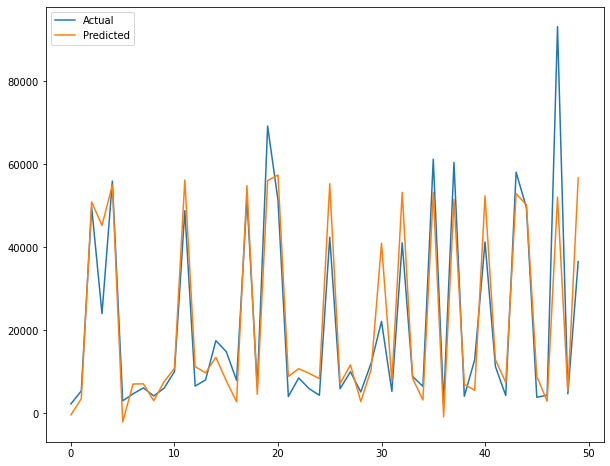

In [58]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

In [60]:
y_pred_reg=reg.predict(x_test)
lin_score_reg = r2_score(y_test , y_pred_reg)
lin_score_reg

0.9051917413403039

In [61]:
p = len(x_train[0])
n = len(y_train)
adj_R2_reg = 1-(1-lin_score_reg)*(n-1)/(n-p-1)
adj_R2_reg

0.9051877605598089

In [62]:
lin_score_reg>adj_R2_reg

True

In [63]:
lin_mape_reg= mean_absolute_percentage_error(y_test,y_pred_reg)
lin_mape_reg

0.43855603622496286

In [64]:
mae_reg=mean_absolute_error(y_test,y_pred_reg)
mae_reg

4647.7998721537515

In [65]:
mse_reg=mean_squared_error(y_test,y_pred_reg)
mse_reg

48924158.69168562

In [66]:
rmse_reg=mse_reg**0.5
rmse_reg

6994.580665893104

<br>

### *Ridge Regression Model* 

In [67]:
rid = linear_model.Ridge(  alpha=0.9)

In [68]:
rid.fit(x_train , y_train)

Ridge(alpha=0.9)

In [69]:
train_score_rid=rid.score(x_train,y_train)

In [70]:
test_score_rid=rid.score(x_test,y_test)

In [71]:
y_pred =rid.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,-375.009072
1,5402,3535.499317
2,49725,50943.089195
3,24056,45287.622372
4,55983,55028.936424
5,3000,-2096.091523
6,4697,7071.122653
7,6133,7104.173815
8,4202,3037.200838
9,6067,7641.402137


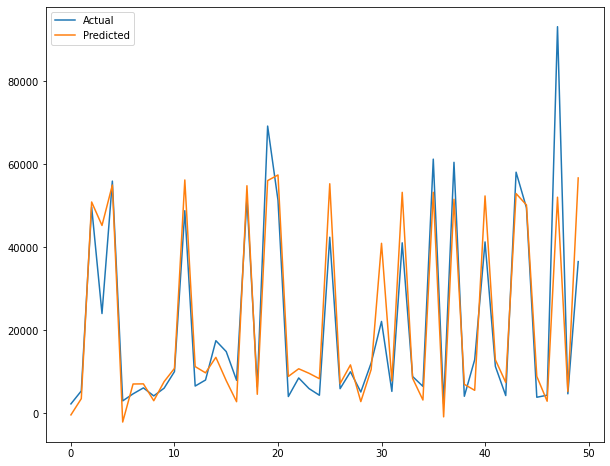

In [72]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [73]:
id = linear_model.Ridge(alpha=0.5)
rid.fit(x_train, y_train)

Ridge(alpha=0.9)

In [74]:
train_score_rid=rid.score(x_train,y_train)

In [75]:
intercept_rid=rid.intercept_

In [76]:
y_pred_rid=rid.predict(x_test)

In [77]:
lin_score_rid = r2_score(y_test , y_pred_rid)
lin_score_rid

0.9051916665929696

In [78]:
adj_R2_rid = 1-(1-lin_score_rid)*(n-1)/(n-p-1)
adj_R2_rid

0.9051876858093361

In [79]:
lin_score_rid>adj_R2_rid

True

In [80]:
lin_mape_rid= mean_absolute_percentage_error(y_test,y_pred_rid)
lin_mape_rid

0.4385635373665308

In [81]:
mae_rid=mean_absolute_error(y_test,y_pred_rid)
mae_rid

4647.836160404306

In [82]:
mse_rid=mean_squared_error(y_test,y_pred_rid)
mse_rid

48924197.263752006

In [83]:
rmse_rid=mse_rid**0.5
rmse_rid

6994.583423174821

### *Lasso Regression Model* 

In [84]:
las = linear_model.Lasso(alpha=0.7)
las.fit(x_train, y_train)

Lasso(alpha=0.7)

In [85]:
train_score_las=las.score(x_train,y_train)

In [86]:
test_score_las=las.score(x_test,y_test)

In [87]:
intercept_las=las.intercept_


In [88]:
y_pred =las.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,-374.848302
1,5402,3541.304370
2,49725,50941.874212
3,24056,45286.046388
4,55983,55023.227200
5,3000,-2094.643063
6,4697,7074.594895
7,6133,7107.203107
8,4202,3036.210070
9,6067,7640.305426


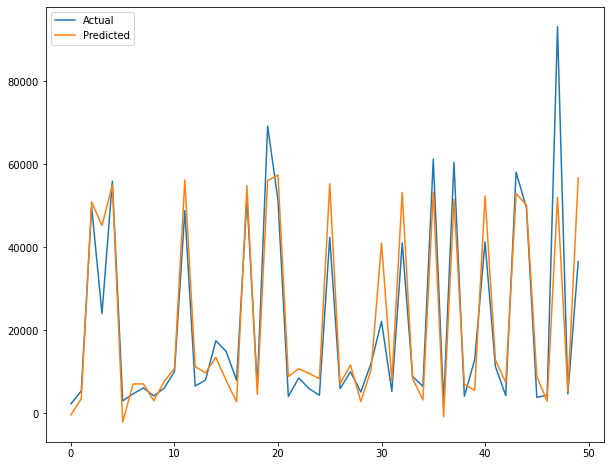

In [89]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [90]:
y_pred_las=las.predict(x_test)

In [91]:
lin_score_las = r2_score(y_test , y_pred_las)
lin_score_las

0.9051910997459934

In [92]:
adj_R2_las = 1-(1-lin_score_las)*(n-1)/(n-p-1)
adj_R2_las

0.9051871189385593

In [93]:
lin_score_las>adj_R2_las

True

In [94]:
lin_mape_las= mean_absolute_percentage_error(y_test,y_pred_las)
lin_mape_las

0.43844758522119454

In [95]:
mae_las=mean_absolute_error(y_test,y_pred_las)
mae_las

4647.432576280342

In [96]:
mse_las=mean_squared_error(y_test,y_pred_las)
mse_las

48924489.77530964

In [97]:
rmse_las=mse_las**0.5
rmse_las

6994.6043330062375

<br>

### *Decision Tree Model* 

In [98]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_features=10,max_depth=7,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features=10, random_state=42)

In [99]:
train_score_dt=dt.score(x_train,y_train)

In [100]:
test_score_dt=dt.score(x_test ,y_test)

In [101]:
y_pred =dt.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,3008.250332
1,5402,6050.993118
2,49725,48425.144941
3,24056,26776.889143
4,55983,60777.733367
5,3000,2550.634951
6,4697,5485.276010
7,6133,4922.398639
8,4202,4562.384835
9,6067,6050.993118


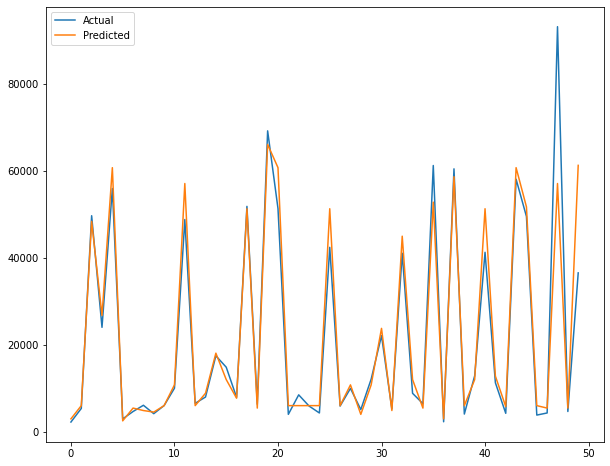

In [102]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [103]:
y_pred_dt=dt.predict(x_test)

In [104]:
lin_score_dt = r2_score(y_test , y_pred_dt)
lin_score_dt

0.9538148039180072

In [105]:
adj_R2_dt = 1-(1-lin_score_dt)*(n-1)/(n-p-1)
adj_R2_dt

0.9538128647079603

In [106]:
lin_score_dt>adj_R2_dt

True

In [107]:
lin_mape_dt= mean_absolute_percentage_error(y_test,y_pred_dt)
lin_mape_dt

0.1939500928067273

In [108]:
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mae_dt

2830.426439542751

In [109]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
mse_dt

23833069.96948991

In [110]:
rmse_dt=mse_dt**0.5
rmse_dt

4881.9125319376535

<br>

### *Random Forest model*

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=7,max_features=10,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, max_features=10, random_state=42)

In [112]:
train_score_rf=rf.score(x_train,y_train)

In [113]:
test_score_rf=rf.score(x_test,y_test)

In [114]:
y_pred =rf.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,2994.647110
1,5402,6023.915230
2,49725,48714.461760
3,24056,26789.171200
4,55983,60601.140935
5,3000,2647.433598
6,4697,5486.636727
7,6133,5084.560712
8,4202,4375.243663
9,6067,6052.137962


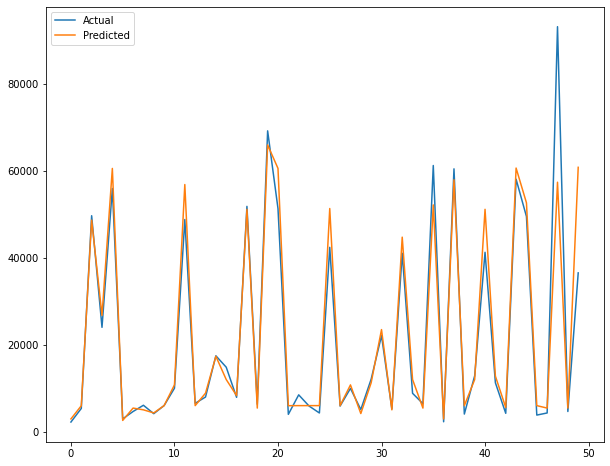

In [115]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [116]:
y_pred_rf=rf.predict(x_test)

In [117]:
lin_score_rf = r2_score(y_test , y_pred_rf)
lin_score_rf

0.955064838399264

In [118]:
adj_R2_rf = 1-(1-lin_score_rf)*(n-1)/(n-p-1)
adj_R2_rf

0.955062951675287

In [119]:
lin_score_rf>adj_R2_rf

True

In [120]:
lin_mape_rf= mean_absolute_percentage_error(y_test,y_pred_rf)
lin_mape_rf

0.1918953981163066

In [121]:
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mae_rf

2789.196381088163

In [122]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
mse_rf

23188011.340677783

In [123]:
rmse_rf=mse_rf**0.5
rmse_rf

4815.393165742314

<br>

### *XGBoost Model* 

In [124]:
import xgboost as xgb

In [125]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 8, n_estimators = 50)
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [126]:
test_score_xg= xg.score(x_test, y_test)

In [127]:
train_score_xg=xg.score(x_train,y_train)

In [128]:
y_pred_xg = xg.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_xg})
data.head(10)

,Y_test,Y_pred
0,2278,2894.508301
1,5402,5230.290527
2,49725,50355.707031
3,24056,25325.232422
4,55983,57380.105469
5,3000,2563.589600
6,4697,5458.396484
7,6133,5008.093750
8,4202,4399.093262
9,6067,6315.758301


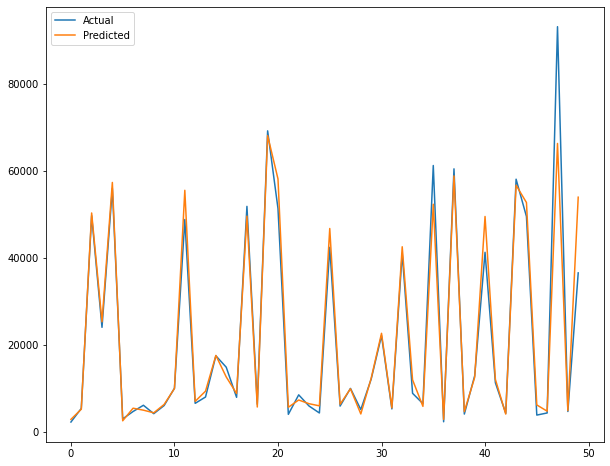

In [129]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [130]:
lin_score_xg = r2_score(y_test , y_pred_xg)
lin_score_xg

0.9754043970479509

In [131]:
adj_R2_xg = 1-(1-lin_score_xg)*(n-1)/(n-p-1)
adj_R2_xg

0.9754033643352118

In [132]:
lin_score_xg>adj_R2_xg

True

In [133]:
lin_mape_xg= mean_absolute_percentage_error(y_test,y_pred_xg)
lin_mape_xg

0.13996380068135003

In [134]:
mae_xg=mean_absolute_error(y_test,y_pred_xg)
mae_xg

1968.6525350455618

In [135]:
mse_xg=mean_squared_error(y_test,y_pred_xg)
mse_xg

12692134.619442005

In [136]:
rmse_xg=mse_xg**0.5
rmse_xg

3562.6022258234225

In [137]:
results={'Models':['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest','XGB'],
        "Train Score":[train_score_reg,train_score_rid,train_score_las,train_score_dt,train_score_rf,train_score_xg],
        "Test Score":[test_score_reg,test_score_rid,test_score_las,test_score_dt,test_score_rf,test_score_xg],
        'R2 Score':[lin_score_reg,lin_score_rid,lin_score_las,lin_score_dt,lin_score_rf,lin_score_xg],
        'Adj R2':[adj_R2_reg,adj_R2_rid,adj_R2_las,adj_R2_dt,adj_R2_rf,adj_R2_xg],
        'MAPE':[lin_mape_reg,lin_mape_rid,lin_mape_las,lin_mape_dt,lin_mape_rf,lin_mape_xg],
        'MAE':[mae_reg,mae_rid,mae_las,mae_dt,mae_rf,mae_xg],
        'MSE':[mse_reg,mse_rid,mse_las,mse_dt,mse_rf,mse_xg],
        'RMSE':[rmse_reg,rmse_rid,rmse_las,rmse_dt,rmse_rf,rmse_xg]}

In [138]:
df_results=pd.DataFrame(results)

In [139]:
df_results.set_index('Models')

,Train Score,Test Score,R2 Score,Adj R2,MAPE,MAE,MSE,RMSE
Models,,,,,,,,
Linear Regression,0.906154,0.905192,0.905192,0.905188,0.438556,4647.799872,4.892416e+07,6994.580666
Ridge,0.906154,0.905192,0.905192,0.905188,0.438564,4647.836160,4.892420e+07,6994.583423
Lasso,0.906154,0.905191,0.905191,0.905187,0.438448,4647.432576,4.892449e+07,6994.604333
Decision Tree,0.955875,0.953815,0.953815,0.953813,0.193950,2830.426440,2.383307e+07,4881.912532
Random Forest,0.957098,0.955065,0.955065,0.955063,0.191895,2789.196381,2.318801e+07,4815.393166
XGB,0.979169,0.975404,0.975404,0.975403,0.139964,1968.652535,1.269213e+07,3562.602226


In [140]:
import statsmodels.api as sm

In [141]:
x2=sm.add_constant(x)
est=sm.OLS(y,x2)

In [142]:
est2=est.fit()

In [143]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 2.868e+05
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:52:55   Log-Likelihood:            -3.0565e+06
No. Observations:              297720   AIC:                         6.113e+06
Df Residuals:                  297709   BIC:                         6.113e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.051e+04     70.841    713.075      0.0